In [1]:
# t-SNE and PCA plot metric and times
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib.pyplot import scatter, figure, subplot, savefig
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import time
import os


/Users/dawnstear/desktop/tensorflow_update/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dawnstear/desktop/tensorflow_update/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [20]:
### Data Set: 13,313 single nucleus mouse brain 
# https://portals.broadinstitute.org/single_cell/study/dronc-seq-single-nucleus-rna-seq-on-mouse-archived-brain#study-download
t = time.time()
try: data13k, labels13k
except:
    data13k  =  pd.read_csv('/Users/dawnstear/desktop/Mid_Atlantic_Poster/sc_data/n_13313_singlenuc/Mouse_Processed_GTEx_Data.DGE.log-UMI-Counts.txt',sep='\t')  
    data13k = data13k.T
    labels13k  =  pd.read_csv('/Users/dawnstear/desktop/Mid_Atlantic_Poster/sc_data/n_13313_singlenuc/metadata_singleNuc_13k.txt',sep='\t')

print(time.time()-t)

#data13k.values[0:3][0:3] # includes gene names
data13k_clipped = data13k.iloc[1:] # clip them off the top
labels13k_clipped = labels13k.iloc[1:]  # drop first row, info not needed

CELL_NAME = labels13k['NAME']   # check that cell BARCODE's match
CLUSTER_NAME =labels13k['Cluster']
CLUSTER_ID = labels13k['ClusterID']

X = data13k_clipped.values
y = CLUSTER_ID.values

BARCODE = data13k_clipped.iloc[:,1]



0.0002472400665283203


In [19]:
# compare CELL_NAME and BARCODE
barcodes = np.asarray(BARCODE[:].index)
cellnames = CELL_NAME.values[1:]
np.array_equal(barcodes,cellnames)

True

In [19]:
'''start = time.time()
X_tsne = TSNE(learning_rate=100)

X_tsne = X_tsne.fit_transform(X)      # cant do tSNE with data this large
time_elapsed = time.time() - start
print(time_elapsed//60,time_elapsed%60)

fig, ax = plt.subplots()
figure(figsize=(100, 100))
#subplot(121)
ax.set(xlabel='t-SNE 1', ylabel='t_SNE 2',title='t-SNE: 1078 cells with 10 subtypes')
ax.legend(y)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)'''



"start = time.time()\nX_tsne = TSNE(learning_rate=100)\n\nX_tsne = X_tsne.fit_transform(X)      # cant do tSNE with data this large\ntime_elapsed = time.time() - start\nprint(time_elapsed//60,time_elapsed%60)\n\nfig, ax = plt.subplots()\nfigure(figsize=(100, 100))\n#subplot(121)\nax.set(xlabel='t-SNE 1', ylabel='t_SNE 2',title='t-SNE: 1078 cells with 10 subtypes')\nax.legend(y)\nax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)"

In [23]:
# PCA 13,313
start = time.time()
pca = PCA(n_components=2, svd_solver='randomized') # use 'auto' not 'full' svd_solver, this will use the 
pca_array = pca.fit_transform(X)             # more efficient 'randomized' solver 
time_elapsed = time.time() - start
print(time_elapsed)




38.17389488220215


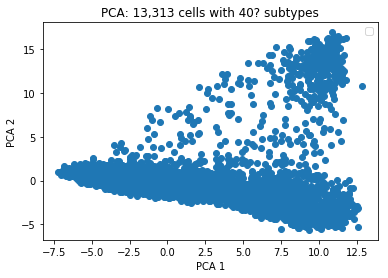

<Figure size 720x720 with 0 Axes>

In [26]:
fig, ax = plt.subplots()
figure(figsize=(10, 10))
ax.set(xlabel='PCA 1', ylabel='PCA 2',title='PCA: 13,313 cells with 40? subtypes/cluster')
ax.legend(y)
ax.scatter(pca_array[:, 0], pca_array[:, 1], cmap=y)

In [27]:
y

array(['9', '7', '9', ..., '1', '11', '2'], dtype=object)